In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
from datetime import datetime
from pathlib import Path
import importlib

# Mis modulos
import ruta_vp
import transportista_cd
import files_management as fm

# Configuracion

In [49]:
# Diccionarios
parse_locaciones = {
    '06 AYA EL PEDREGAL': 'Pedregal',
    '38 AYA ATICO': 'Atico',
    '40 AYA CHALA': 'Chala',
    '88 AYA CAMANA': 'Camana'
}
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
transportista = {
    "name": "transportista",
    "file_name": "Cf_programadas_por_transportista.csv",    # Nombre del archivo local
    "file_address": "",                                     # Direccion del archivo local
    "date": "Fecha",
    "date_format": "dd\/mm\/yyyy",
    "transportista": "Código de Transportista",
    "relevant_columns": [
        'Locación', 
        'Transportista',
        'Fecha',
        'Carga Total CF',
        'Carga Pvta CF',
        'Rechazo CF',        
        'Orden de Carga',
        'Código de Transportista'
    ],
    "reports": [ # sobre 'Carga Pvta CF'
        'Transportista',
    ]
}
ruta = {
    "name": "ruta",
    "file_name": "Cf_rech_por_ruta.csv",                    # Nombre del archivo local
    "file_address": "",                                     # Direccion del archivo local
    "date": "Día",    
    "date_format": "d\/m\/yy",
    "transportista": "Código Transportista",
    "relevant_columns": [
        'Locación',
        'Ruta Troncal Dinámico',
        'Motivo de anulación',
        'Día',
        'Venta Perdida CF',
        'Cliente',
        'Transportista',
        'Nombre Vendedor',
        'Número de orden de carga',
        'Código Transportista'
    ],
    "reports": [ # sobre 'Venta Perdida CF'
        'Motivo de anulación',
        'Transportista',
        'Ruta Troncal Dinámico',        
    ]
}

# Listas
locaciones = ['06 AYA EL PEDREGAL', '38 AYA ATICO', '40 AYA CHALA', '88 AYA CAMANA']

# Constantes
root_address = r'C:\Informacion\rechazos'
project_address = r'C:\Informacion\rechazos\Analisis\data_analysis_ruta'
output_file_name = "output_file.csv"

<>:18: SyntaxWarning: invalid escape sequence '\/'
<>:39: SyntaxWarning: invalid escape sequence '\/'
<>:18: SyntaxWarning: invalid escape sequence '\/'
<>:39: SyntaxWarning: invalid escape sequence '\/'
C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_13924\3478352925.py:18: SyntaxWarning: invalid escape sequence '\/'
  "date_format": "dd\/mm\/yyyy",
C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_13924\3478352925.py:39: SyntaxWarning: invalid escape sequence '\/'
  "date_format": "d\/m\/yy",


### Seleccionar documento a procesar

In [50]:
importlib.reload(fm)

opcion_fuente = int(input("(1=Ruta) (2=Transportista)"))

if opcion_fuente == 1:
    df = fm.file_processing(
        ruta, 
        output_file_name, 
        locaciones
    )
else:
    df = fm.file_processing(
        transportista, 
        output_file_name, 
        locaciones
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Subregion Comercial         8577 non-null   object 
 1   Locación                    8577 non-null   object 
 2   Ruta Troncal Dinámico       8577 non-null   object 
 3   Ruta Figura Dinámico        8577 non-null   object 
 4   Sistema de Ventas Dinámico  8577 non-null   object 
 5   Supervisor                  7410 non-null   object 
 6   VendedorCod                 8577 non-null   int64  
 7   Motivo de anulación         8577 non-null   object 
 8   Número de Pedido            8577 non-null   int64  
 9   Número de orden de carga    8567 non-null   float64
 10  Número de Guía              8577 non-null   int64  
 11  Semana                      8577 non-null   int64  
 12  Mes                         8577 non-null   object 
 13  Año                         8577 

### Procesamiento de documentos

Parseo de fecha

In [51]:
# Parsear la fecha para su filtrado
importlib.reload(ruta_vp)
importlib.reload(transportista_cd)

if opcion_fuente == 1:
    df = ruta_vp.parse_date(
        ruta, 
        df, 
    )
else:
    df = transportista_cd.parse_date(
        transportista, 
        df, 
    )

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Locación                  8577 non-null   object        
 1   Ruta Troncal Dinámico     8577 non-null   object        
 2   Motivo de anulación       8577 non-null   object        
 3   Día                       8577 non-null   datetime64[ns]
 4   Venta Perdida CF          8577 non-null   float64       
 5   Cliente                   8577 non-null   object        
 6   Transportista             8577 non-null   object        
 7   Nombre Vendedor           8577 non-null   object        
 8   Número de orden de carga  8577 non-null   float64       
 9   Código Transportista      8577 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 670.2+ KB
None


c:\Informacion\rechazos\Analisis\data_analysis_ruta\ruta_vp.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  def parse_date(file, df):


Filtrado por tiempo

In [52]:
importlib.reload(fm)

''' ESCOGER QUE TIPO DE ANALISIS HACER
(1) Por Año (Escoger el año especifico) (Analisis de todo ese año)
(2) Por Mes (Escoger el mes especifico) (Analisis de todo ese mes)
(3) Por Día (Escoger el día especifico) (Analisis de todo ese día)
(4) Intervalo (Escoger fecha de inicio y fecha de fin especificas) (Analisis de todo el intervalo considerando las fechas ingresadas)
(5) Mayor igual que (Escoger fecha de inicio) (Analisis considerando esa fecha hasta el ultimo registro existente)
'''

# Seleccionar la opcion_tiempo de análisis por tiempo
time_option = int(input("(1=Año) (2=Mes) (3=Dia) (4=Intervalo) (5=Mayor igual que)"))

if opcion_fuente == 1:
    df, date = fm.get_specific_date(
        df,
        ruta,
        time_option
    )
else:
    df, date = fm.get_specific_date(
        df,
        transportista,
        time_option
    )

Filtrado por locacion

In [53]:
importlib.reload(fm)

# Seleccionar locaciones
location_option = int(input(f'(1=Todas) (2={locaciones[0]}) (3={locaciones[1]}) (4={locaciones[2]}) (5={locaciones[3]})'))

df = fm.get_specific_location(df, location_option, locaciones)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 8406 to 8572
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Locación                  116 non-null    object        
 1   Ruta Troncal Dinámico     116 non-null    object        
 2   Motivo de anulación       116 non-null    object        
 3   Día                       116 non-null    datetime64[ns]
 4   Venta Perdida CF          116 non-null    float64       
 5   Cliente                   116 non-null    object        
 6   Transportista             116 non-null    object        
 7   Nombre Vendedor           116 non-null    object        
 8   Número de orden de carga  116 non-null    float64       
 9   Código Transportista      116 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 10.0+ KB
None


### Reportes Ruta o Transportista

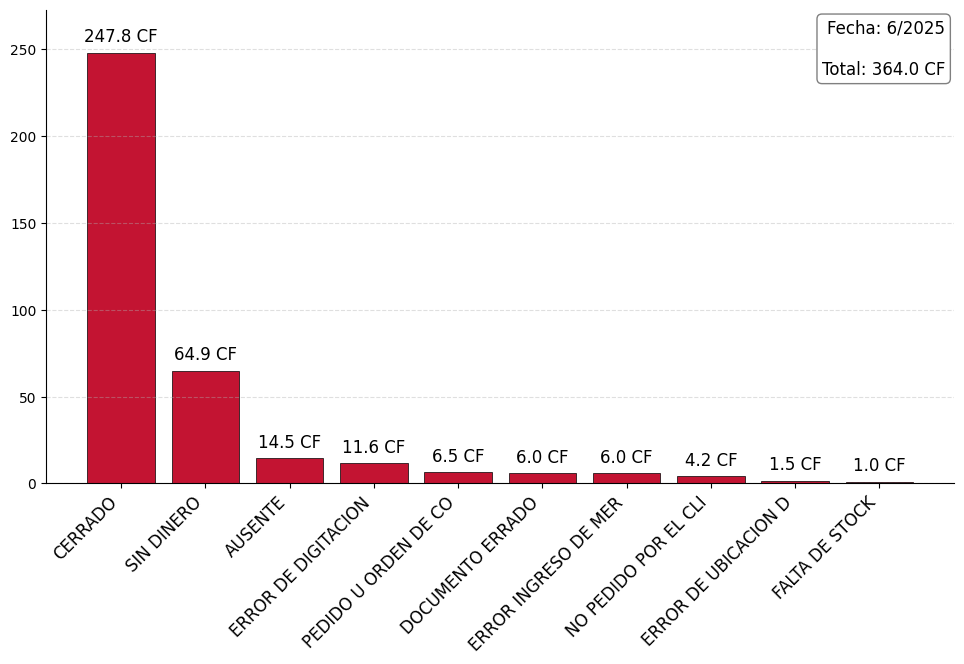

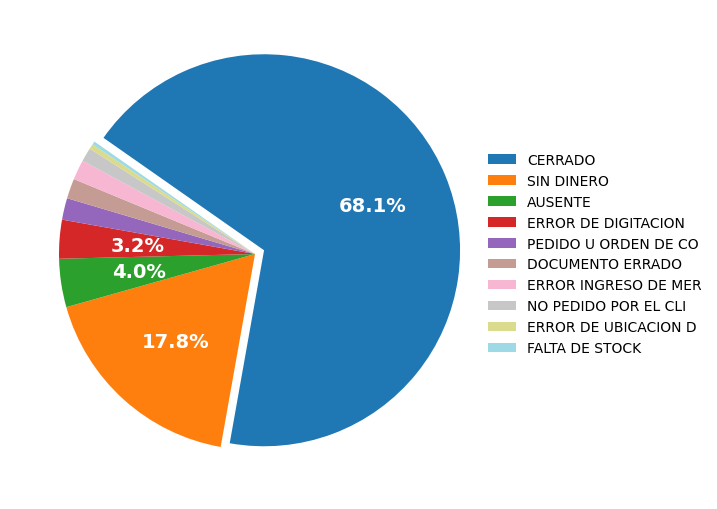

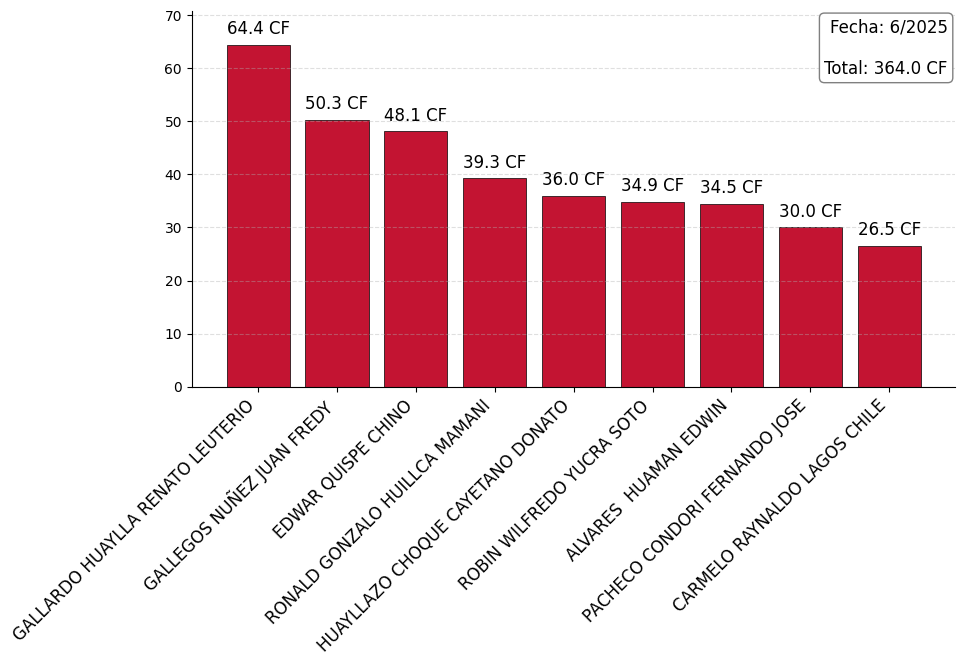

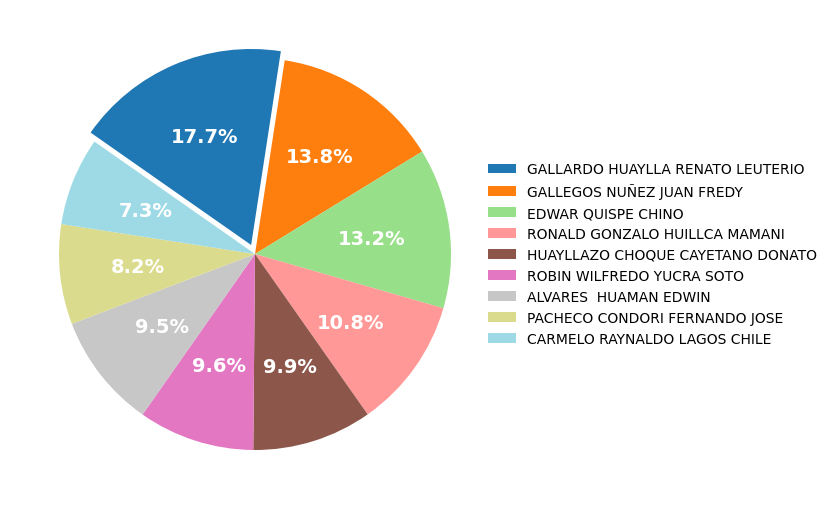

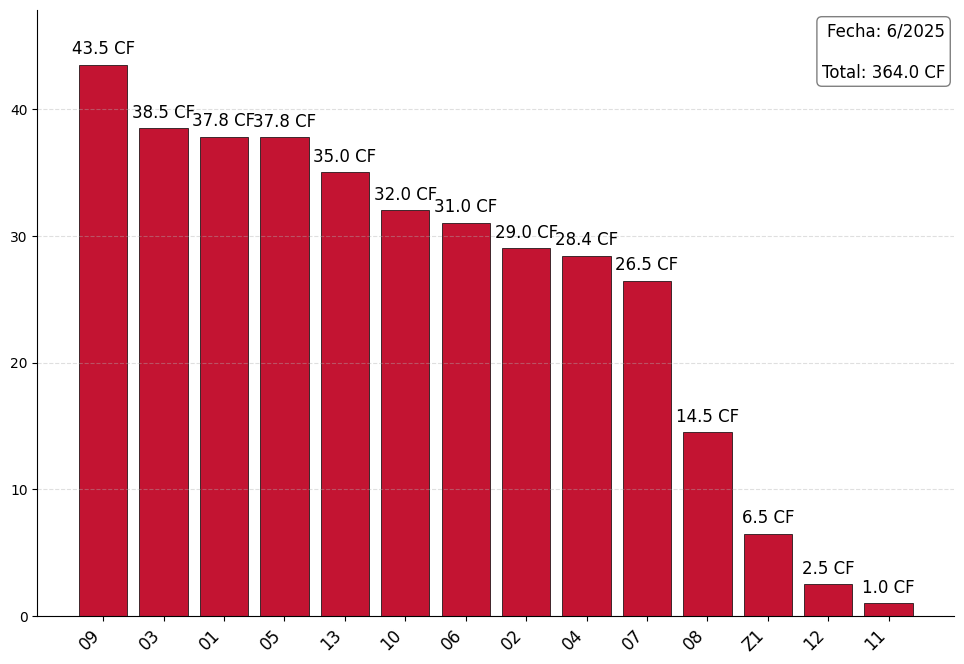

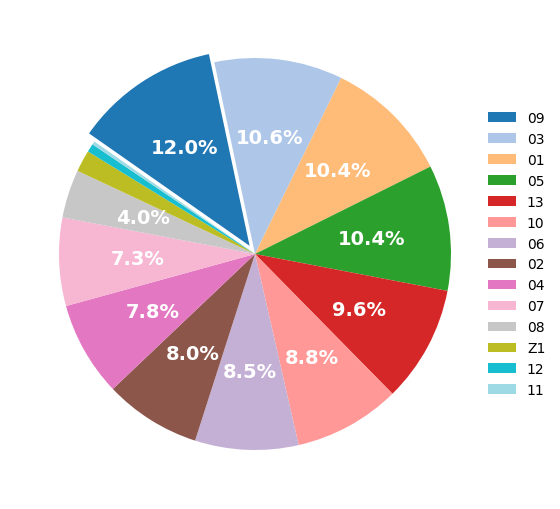

In [57]:
importlib.reload(ruta_vp)
importlib.reload(transportista_cd)

if opcion_fuente == 1:
    ruta_vp.main(
        df,
        ruta,
        date
    )
else:
    transportista_cd.main(
        df,
        transportista,
        date
    )

### Envio de Reporte

### Limpiar carpeta

In [ ]:
# carpeta = Path('C:/Informacion/rechazos/Analisis/data_analysis_ruta')
# print(list(carpeta.glob('*.png')))

# # Eliminar archivos .png
# for imagen in carpeta.glob('*.png'):
#     imagen.unlink()  # .unlink() elimina el archivo
#     print(f'Eliminado: {imagen}')

[WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/bar_Motivo de anulación_Venta Perdida CF.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/bar_Ruta Troncal Dinámico_Venta Perdida CF.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/bar_Transportista_Venta Perdida CF.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/circle_Motivo de anulación_Venta Perdida CF.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/circle_Ruta Troncal Dinámico_Venta Perdida CF.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/circle_Transportista_Venta Perdida CF.png')]
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\bar_Motivo de anulación_Venta Perdida CF.png
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\bar_Ruta Troncal Dinámico_Venta Perdida CF.png
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\bar_Transportista_Venta Perdida CF.png


# ANALISIS

In [56]:
# Patrones
